In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

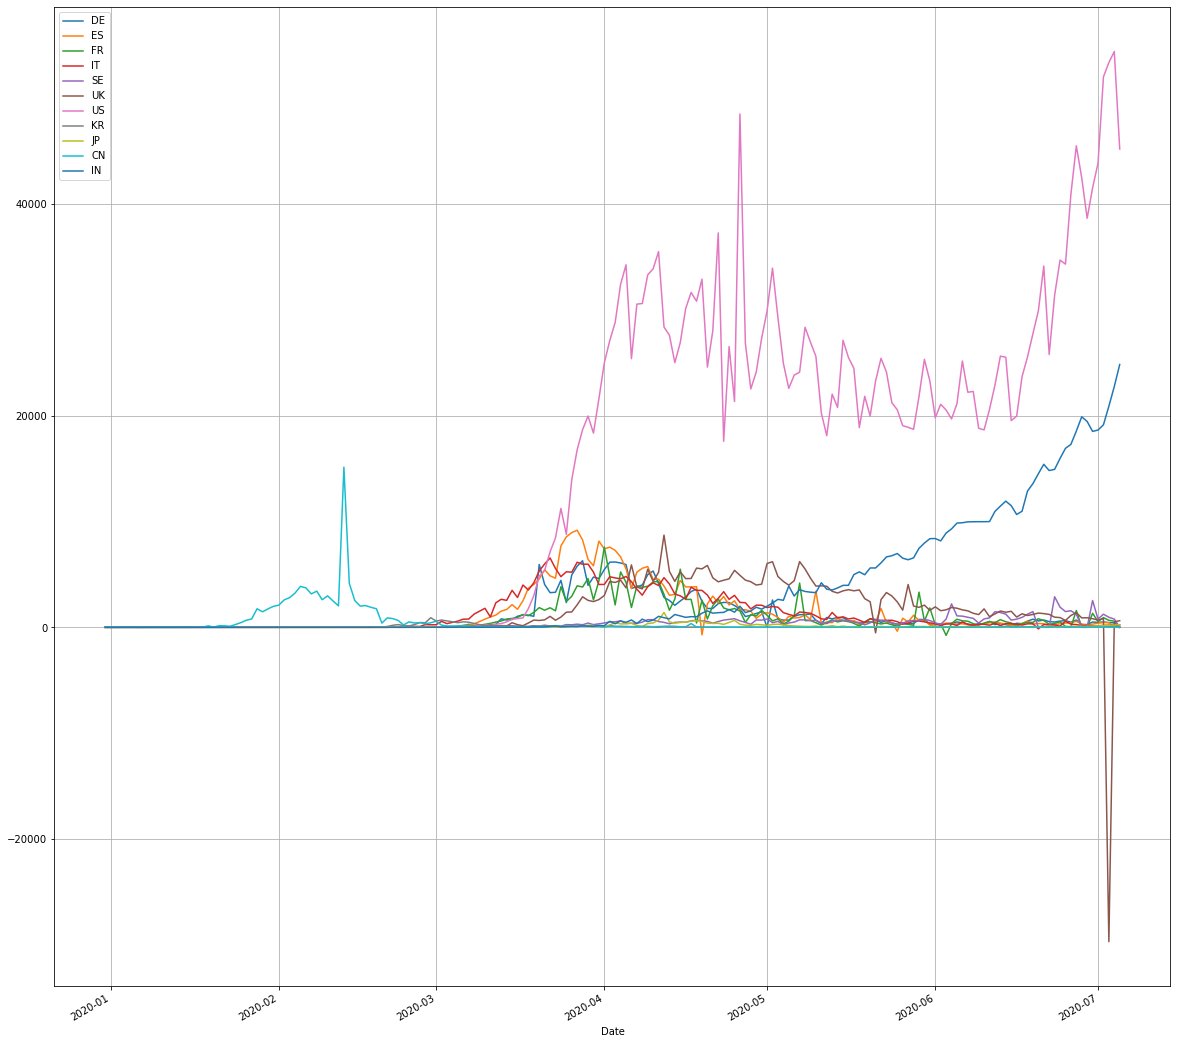

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

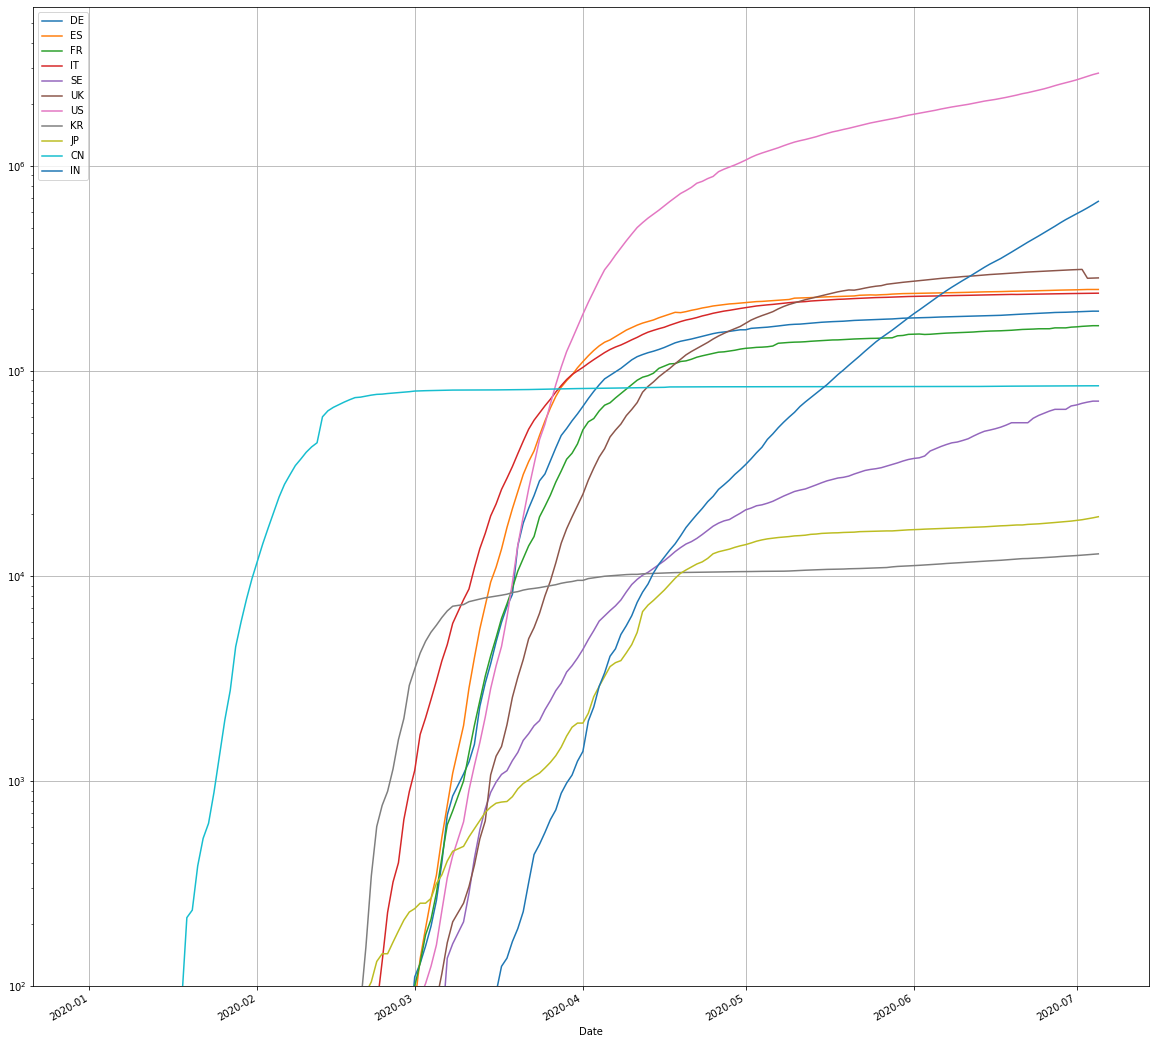

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

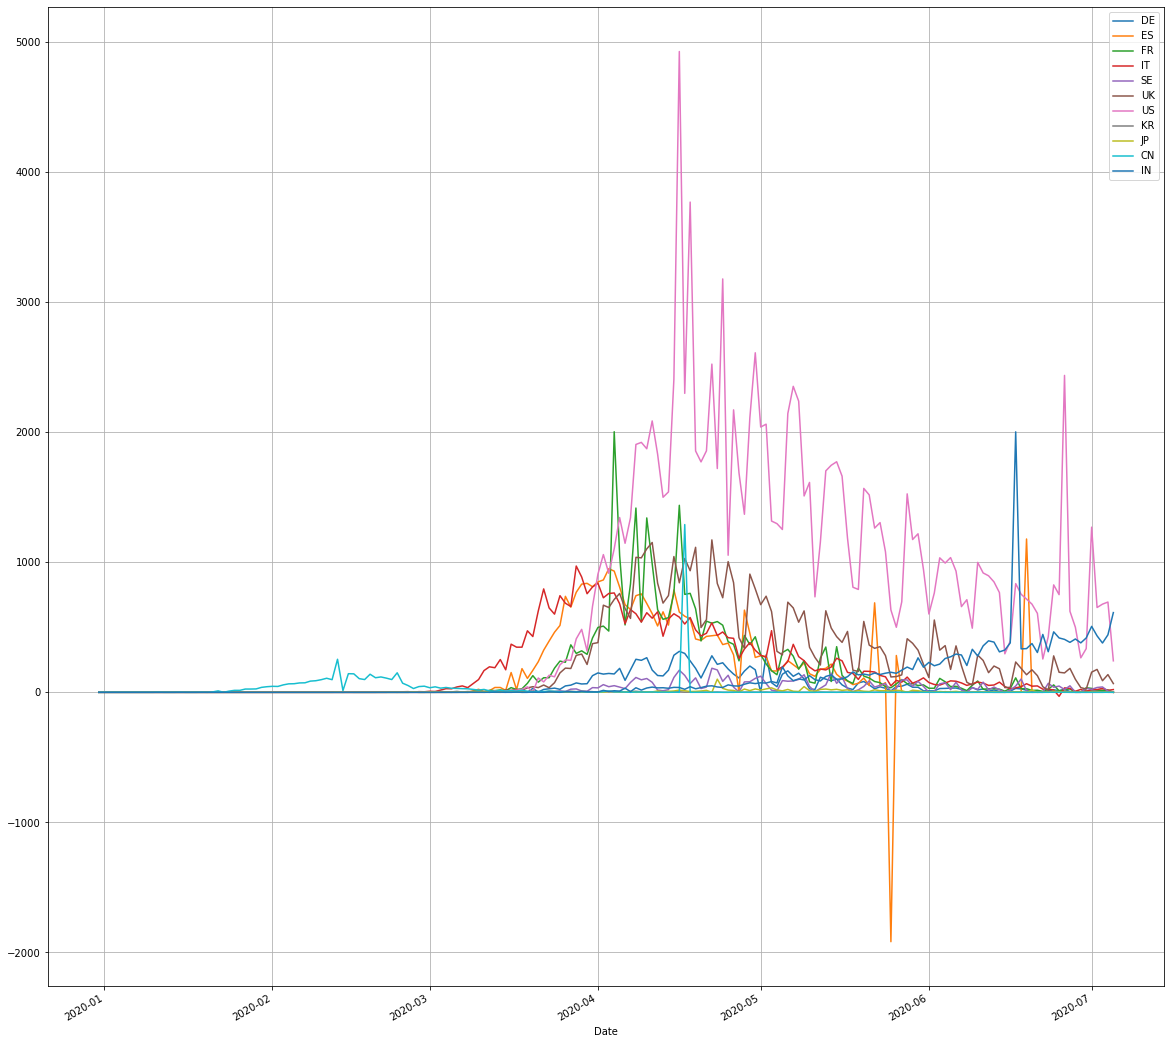

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

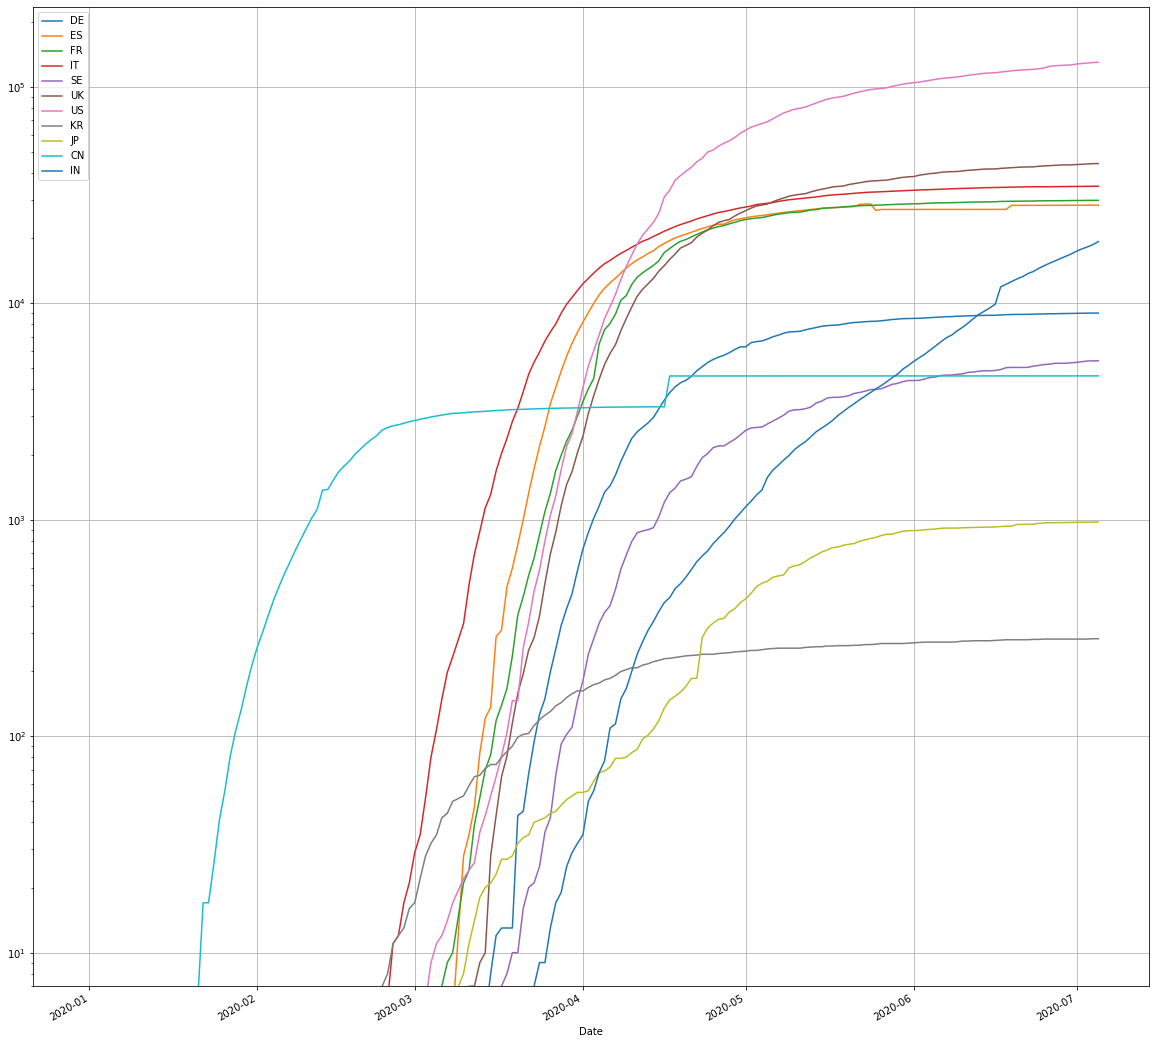

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-06-21,687.0,334.0,641,264,0,1295,34158,48,0,29,15413
12,2020-06-22,537.0,232.0,284,224,0,1221,25793,17,117,19,14821
11,2020-06-23,503.0,248.0,373,221,2889,958,31390,46,52,52,14933
10,2020-06-24,587.0,334.0,517,113,1905,921,34720,51,59,29,15968
9,2020-06-25,630.0,400.0,81,577,1487,652,34339,28,83,20,16922
8,2020-06-26,477.0,419.0,0,296,1566,1118,40949,39,87,28,17296
7,2020-06-27,687.0,564.0,1588,255,1247,1380,45527,51,100,24,18552
6,2020-06-28,256.0,301.0,0,175,0,890,42486,62,93,18,19906
5,2020-06-29,262.0,200.0,0,174,0,901,38673,42,86,14,19459
4,2020-06-30,498.0,301.0,1324,126,2530,814,41556,43,117,23,18522


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-06-21,189767.0,245839.0,159683.0,236783.0,56001.0,303043.0,2254998.0,12173.0,17766.0,84508.0,410461.0
2020-06-22,190304.0,246071.0,159967.0,237007.0,56001.0,304264.0,2280791.0,12190.0,17883.0,84527.0,425282.0
2020-06-23,190807.0,246319.0,160340.0,237228.0,58890.0,305222.0,2312181.0,12236.0,17935.0,84579.0,440215.0
2020-06-24,191394.0,246653.0,160857.0,237341.0,60795.0,306143.0,2346901.0,12287.0,17994.0,84608.0,456183.0
2020-06-25,192024.0,247053.0,160938.0,237918.0,62282.0,306795.0,2381240.0,12315.0,18077.0,84628.0,473105.0
2020-06-26,192501.0,247472.0,160938.0,238214.0,63848.0,307913.0,2422189.0,12354.0,18164.0,84656.0,490401.0
2020-06-27,193188.0,248036.0,162526.0,238469.0,65095.0,309293.0,2467716.0,12405.0,18264.0,84680.0,508953.0
2020-06-28,193444.0,248337.0,162526.0,238644.0,65095.0,310183.0,2510202.0,12467.0,18357.0,84698.0,528859.0
2020-06-29,193706.0,248537.0,162526.0,238818.0,65095.0,311084.0,2548875.0,12509.0,18443.0,84712.0,548318.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-06-21,0.0,1.0,16,49,0,128,607,0,0,1,306
12,2020-06-22,3.0,1.0,7,24,0,43,256,0,1,0,445
11,2020-06-23,10.0,1.0,23,23,69,15,427,1,2,0,312
10,2020-06-24,19.0,2.0,57,18,39,280,826,0,8,1,465
9,2020-06-25,13.0,3.0,11,-31,48,154,751,1,5,0,418
8,2020-06-26,21.0,8.0,21,34,21,149,2437,0,1,1,407
7,2020-06-27,6.0,3.0,26,30,50,184,623,0,2,0,384
6,2020-06-28,3.0,2.0,0,8,0,100,500,0,0,0,410
5,2020-06-29,4.0,3.0,0,22,0,36,265,0,1,0,380
4,2020-06-30,12.0,9.0,35,6,30,25,336,0,0,0,418


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-06-21,8882.0,28323.0,29624.0,34477.0,5053.0,42589.0,119715.0,279.0,951.0,4616.0,13254.0
2020-06-22,8885.0,28324.0,29631.0,34501.0,5053.0,42632.0,119971.0,279.0,952.0,4616.0,13699.0
2020-06-23,8895.0,28325.0,29654.0,34524.0,5122.0,42647.0,120398.0,280.0,954.0,4616.0,14011.0
2020-06-24,8914.0,28327.0,29711.0,34542.0,5161.0,42927.0,121224.0,280.0,962.0,4617.0,14476.0
2020-06-25,8927.0,28330.0,29722.0,34511.0,5209.0,43081.0,121975.0,281.0,967.0,4617.0,14894.0
2020-06-26,8948.0,28338.0,29743.0,34545.0,5230.0,43230.0,124412.0,281.0,968.0,4618.0,15301.0
2020-06-27,8954.0,28341.0,29769.0,34575.0,5280.0,43414.0,125035.0,281.0,970.0,4618.0,15685.0
2020-06-28,8957.0,28343.0,29769.0,34583.0,5280.0,43514.0,125535.0,281.0,970.0,4618.0,16095.0
2020-06-29,8961.0,28346.0,29769.0,34605.0,5280.0,43550.0,125800.0,281.0,971.0,4618.0,16475.0
